In [ ]:
# Salaries for San Francisco Employees: ML & EDA Project

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
# Step 2: Load Dataset
df = pd.read_csv('employee_salary.csv')
df.head()


C:\Users\ritam\AppData\Local\Temp\ipykernel_8276\3686786.py:2: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('employee_salary.csv')


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011


In [ ]:
# Step 3: Data Cleaning
cols_to_convert = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=['BasePay', 'TotalPayBenefits'])
df = df[(df['TotalPay'] > 0) & (df['TotalPayBenefits'] > 0)]

In [ ]:
# Step 4: EDA
print("\n--- Dataset Overview ---")
print(df.info())
print("\n--- Descriptive Statistics ---")
print(df.describe())


--- Dataset Overview ---
<class 'pandas.core.frame.DataFrame'>
Index: 311856 entries, 0 to 312861
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      311856 non-null  object 
 1   JobTitle          311856 non-null  object 
 2   BasePay           311856 non-null  float64
 3   OvertimePay       311856 non-null  float64
 4   OtherPay          311856 non-null  float64
 5   Benefits          275700 non-null  float64
 6   TotalPay          311856 non-null  float64
 7   TotalPayBenefits  311856 non-null  float64
 8   Year              311856 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 23.8+ MB
None

--- Descriptive Statistics ---
             BasePay    OvertimePay       OtherPay       Benefits  \
count  311856.000000  311856.000000  311856.000000  275700.000000   
mean    69902.276001    5687.551424    3463.518703   25088.008789   
std     45335.047492   12762.43726

C:\Users\ritam\AppData\Local\Temp\ipykernel_7936\1087273252.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_salary.values, y=job_salary.index, palette='Blues_d')


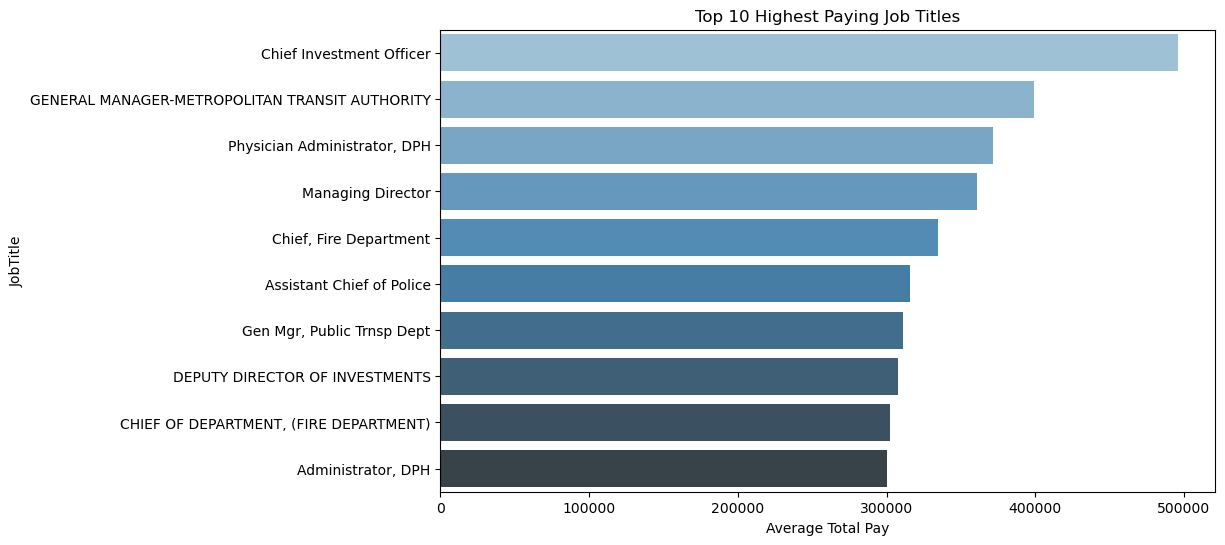

In [ ]:
# Visualization: Top 10 Highest Paying Job Titles
job_salary = df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=job_salary.values, y=job_salary.index, palette='Blues_d')
plt.title('Top 10 Highest Paying Job Titles')
plt.xlabel('Average Total Pay')
plt.show()

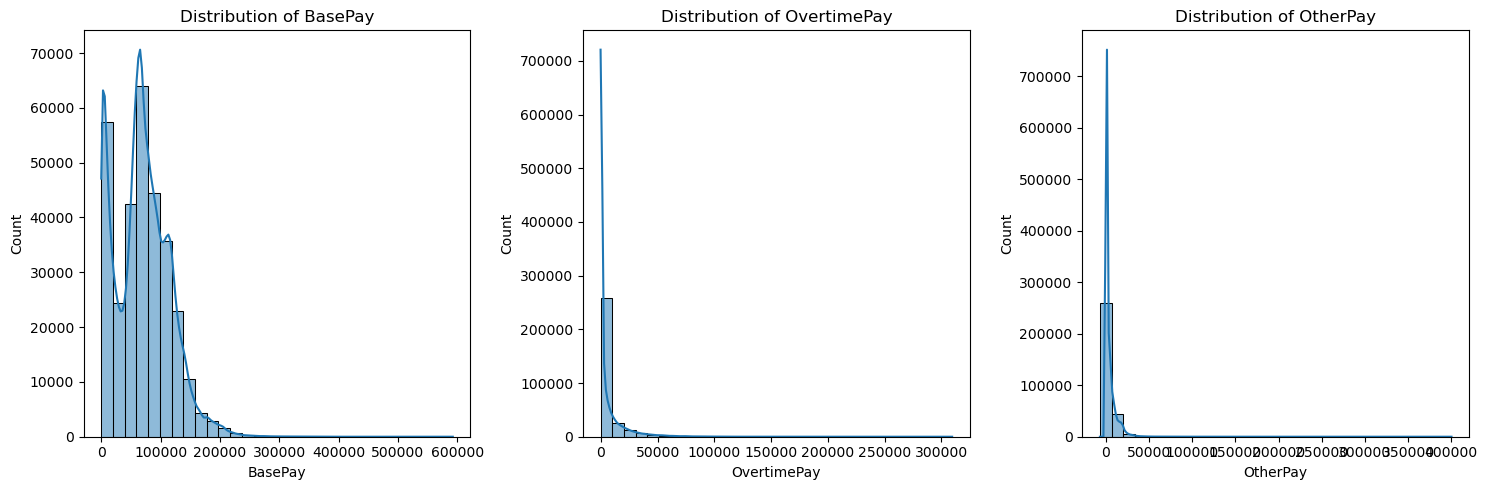

In [ ]:
# Distribution of Pay Types
plt.figure(figsize=(15,5))
for i, col in enumerate(['BasePay', 'OvertimePay', 'OtherPay']):
    plt.subplot(1,3,i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

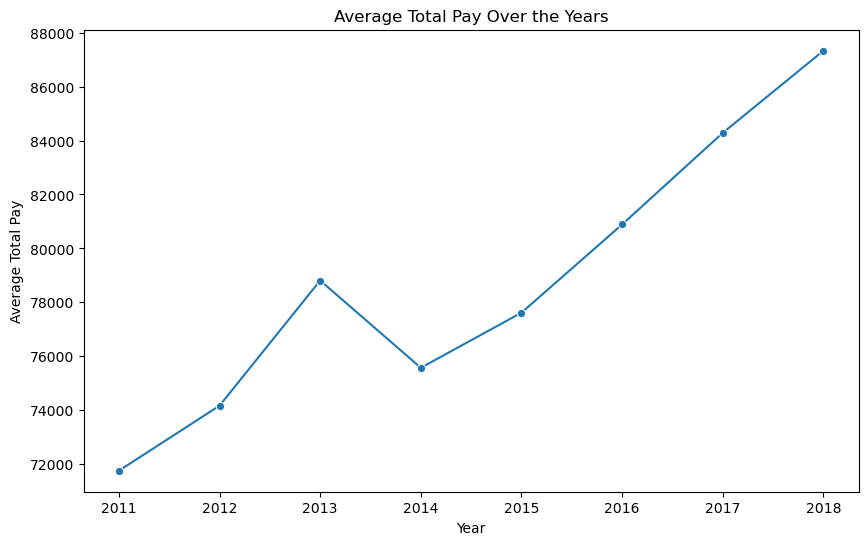

In [ ]:
# Average Pay Over the Years
pay_over_years = df.groupby('Year')['TotalPay'].mean()
plt.figure(figsize=(10,6))
sns.lineplot(x=pay_over_years.index, y=pay_over_years.values, marker='o')
plt.title('Average Total Pay Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Total Pay')
plt.show()

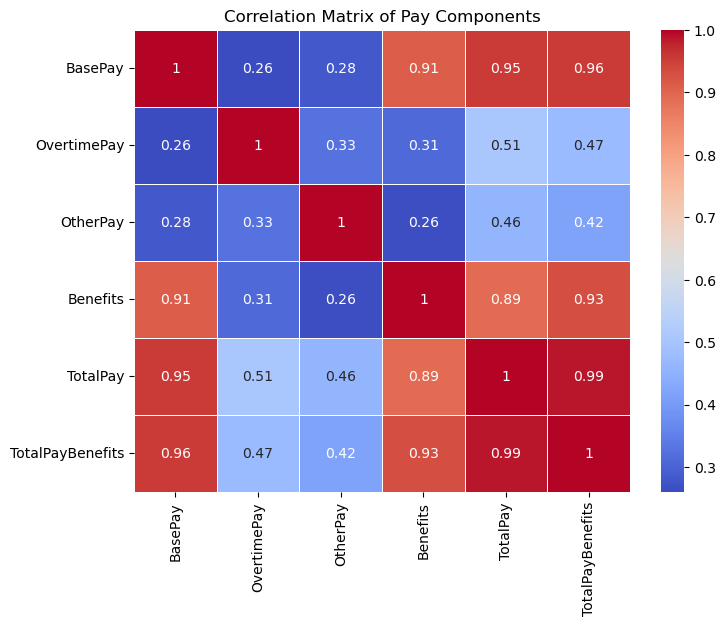

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
corr_matrix = df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Pay Components')
plt.show()

In [ ]:
# Step 5: Machine Learning - Predict TotalPayBenefits
# One-hot encode JobTitle
df_encoded = pd.get_dummies(df, columns=['JobTitle'], drop_first=True)

X = df_encoded.drop(columns=['EmployeeName', 'TotalPayBenefits'])
y = df_encoded['TotalPayBenefits']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'\nMean Absolute Error: {mae:.2f}')
print(f'R-squared Score: {r2:.2f}')

# Summary
summary = f"""
Project Summary:
----------------
- Dataset contains salaries of SF public employees from 2011-2018.
- Total rows after cleaning: {df.shape[0]}
- Top job titles by average pay include executive and specialist roles.
- Salaries have generally increased over the years.
- Model predicts TotalPayBenefits with R² score of {r2:.2f} and MAE of {mae:.2f}.
- Benefits and BasePay show high correlation with overall compensation.
"""
print(summary)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values